<h1> Planejamento de Experimentos </h1>

# <font color='red' style='font-size: 30px;'>1.0 Introdução   </font>
<hr>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> “Chamar um especialista em estatística depois que o experimento foi feito pode ser o mesmo que pedir para ele fazer um exame post-mortem. Talvez ele consiga dizer do que foi que o experimento morreu.”  </i>     
</p>    

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: right; text-indent: 0px;'>    
    <b>Sir Ronald Fisher</b>  

# <font color='red' style='font-size: 30px;'> Introdução à análise de experimentos   </font>
<hr>

# <font color = 'purple'> Inserindo o experimento num Data Frame </font>
<hr>

## Importando as bibliotecas 
<hr>
### Pandas

https://pandas.pydata.org/

### Numpy

http://www.numpy.org/

### pyDOE2

https://pypi.org/project/pyDOE2/

###  Importando o Seaborn

https://seaborn.pydata.org

In [42]:
import pandas as pd 
import numpy as np 
import pyDOE2 as doe
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import stats

# Ensaios realizados na forma normalizada
<hr>
<img width='800px' src='figuras/Figura_2.png'>
<hr>    


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
Construindo uma matriz representando todos os ensaios realizados:


In [2]:
ensaios = np.array([[-1, -1], [1 , -1], [-1, 1], [1, 1]])

## Costruindo um planejamento fatorial de 2²


In [3]:
# Ensaio fatorial com dois níveis
ensaios = doe.ff2n(2)

In [4]:
ensaios

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

## Inserindo o planejamento em um Data Frame

In [5]:
colunas = ['Farinha', 'Chocolate']
experimento = pd.DataFrame(data = ensaios, columns = colunas)
experimento

,Farinha,Chocolate
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


### Inserindo coluna com os resultados 

In [6]:
experimento['Porções'] = [19, 37, 24, 49]
experimento 

,Farinha,Chocolate,Porções
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


<hr>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <b>Conclusão:</b> Temos, por fim, nosso experimento representado por um <i>DataFrame</i> do Pandas. Usaremos este <i>DataFrame</i> para iniciarmos a análise do nosso experimento. 
<hr>   

# Analisando graficamente o experimento
<hr>

In [7]:
# Parâmetros gráficos
sns.set_palette('terrain')
sns.set_style('darkgrid')

### Para a farinha

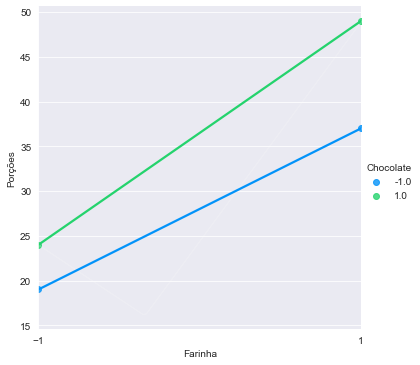

In [8]:
ax1 = sns.lmplot(data = experimento, x = 'Farinha', y = 'Porções', ci = False, hue = 'Chocolate')
ax1.set(xticks = (-1, 1))

### Para o chocolate

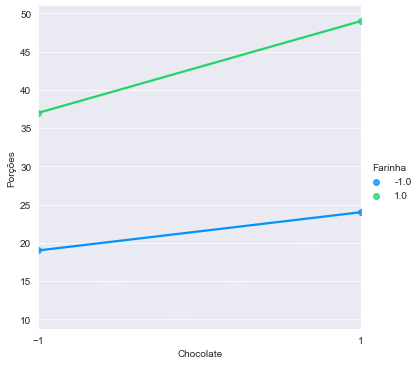

In [9]:
ax2 = sns.lmplot(data = experimento, x = 'Chocolate', y = 'Porções', ci = False, hue = 'Farinha')
ax2.set(xticks = (-1, 1))

#  Ajustando o modelo estatístico
<hr>

<hr>
<img width='800px' src='figuras/Figura_3.png'>
<hr>

### Bibliotecas  Stats Model


In [10]:
modelo = smf.ols(data = experimento, formula = 'Porções ~ Farinha + Chocolate + Farinha : Chocolate')
modelo

In [11]:
# Ajustando o modelo 
modelo_ajustado = modelo.fit()
modelo_ajustado

In [12]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porções   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                nan
Time:                        14:16:12   Log-Likelihood:                    inf
No. Observations:                   4   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        na

# <font color = 'purple'> Aumentando os Graus de liberdade  </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px whit;'>



<p style='margin: 30px 30px;'>     
    


<hr>


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red">

<img width='800px' src='figuras/Figura_5.png'> 


<p style='margin: 30px 30px;'> 
    
    
 
    

    
<hr>    

In [13]:
centro = np.array([[0, 0, 29], [0, 0, 30], [0, 0, 29], [0, 0, 30]])

In [14]:
colunas = ['Farinha', 'Chocolate', 'Porções']
centro_df = pd.DataFrame(centro, columns = colunas, index = [4, 5, 6, 7])
centro_df

,Farinha,Chocolate,Porções
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


In [15]:
experimento = experimento.append(centro_df)
experimento 

,Farinha,Chocolate,Porções
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49
4,0.0,0.0,29
5,0.0,0.0,30
6,0.0,0.0,29
7,0.0,0.0,30


# <font color = 'purple'>  Análise de significância estatística   </font>
<hr>

In [16]:
modelo = smf.ols(data = experimento, formula = 'Porções ~ Farinha + Chocolate + Farinha:Chocolate')
modelo

In [17]:
modelo_ajustado = modelo.fit()
modelo_ajustado

In [18]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porções   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Tue, 01 Jun 2021   Prob (F-statistic):            0.00152
Time:                        14:16:13   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.8750      0.71

<hr></hr>
<img width='400px' src='figuras/Figura_6.png'>
<hr> </hr>
<img width='600px' src='figuras/Figura_7.png'> 
<hr> </hr>
<img width='600px' src='figuras/Figura_10.png'> 
<hr> </hr> 

# <font color = 'purple'> Teste de significância estatística usando o <b>t<b>    </font>

<hr>
<img width='600px' src='figuras/Figura_11.png'> 
<hr>
<img width='900px' src='figuras/Figura_8.png'> 
<hr>

### Plotando o gráfico 
### Gráfico padronizado de Paretto

In [19]:
t_valores = modelo_ajustado.tvalues
t_valores

Intercept            43.494275
Farinha              10.708252
Chocolate             4.233495
Farinha:Chocolate     1.743204
dtype: float64

In [20]:
nome = t_valores.index.tolist()
nome

['Intercept', 'Farinha', 'Chocolate', 'Farinha:Chocolate']

In [21]:
distribuicao = stats.t(df = 4)
distribuicao.ppf(q = 1 - 0.025)

2.7764451051977987

In [22]:
limite = [distribuicao.ppf(q = 1 - 0.025)] * len(nome)
limite

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

Text(0.5, 1.0, 'Gráfico de pareto | Valores T-tabelados')

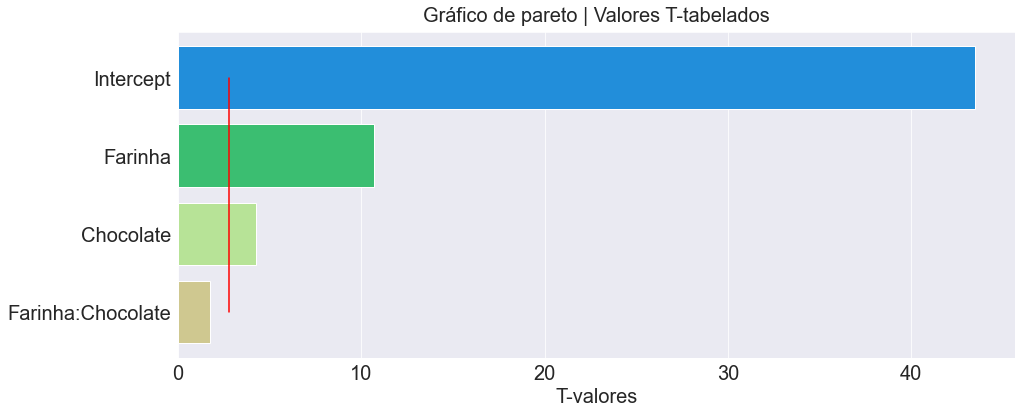

In [23]:
pareto = sns.barplot(x = t_valores, y = nome)
pareto.figure.set_size_inches(15, 6)
pareto.tick_params(labelsize = 20)
pareto.set_xlabel('T-valores', fontsize = 20)
pareto.plot(limite, nome, color = 'red')
pareto.set_title('Gráfico de pareto | Valores T-tabelados', fontsize = 20, pad = 10)

# <font color = 'purple'> Propondo um novo modelo   </font>

<hr>

<img width='800px' src='figuras/Figura_3.png'>

<p style='margin: 30px 30px;'> 

<hr>

<img width='600px' src='figuras/Figura_9.png'> 
<hr>    

In [24]:
modelo_2 = smf.ols(data = experimento, formula = 'Porções ~ Farinha + Chocolate')
modelo_2

In [25]:
modelo_ajustado_2 = modelo_2.fit()
modelo_ajustado_2

In [26]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porções   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           0.000571
Time:                        14:16:15   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

# Gráfico Padronizado de Pareto do novo modelo    
<hr>

In [27]:
t_valores = modelo_ajustado_2.tvalues
t_valores

Intercept    36.658022
Farinha       9.025173
Chocolate     3.568092
dtype: float64

In [28]:
nome = t_valores.index.tolist()
nome

['Intercept', 'Farinha', 'Chocolate']

In [29]:
distribuicao = stats.t(df = 5)
distribuicao

In [30]:
distribuicao.ppf(q = 1 - 0.025)

2.5705818366147395

In [31]:
limite = [distribuicao.ppf(q = 1 - 0.025)] * len(nome)
limite

[2.5705818366147395, 2.5705818366147395, 2.5705818366147395]

### Plotando o gráfico

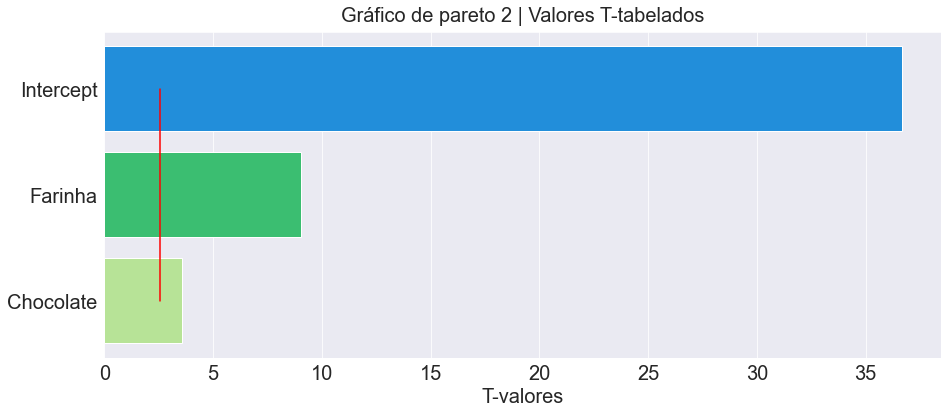

In [32]:
pareto = sns.barplot(x = t_valores, y = nome)
pareto.figure.set_size_inches(15,6)
pareto.tick_params(labelsize = 20)
pareto.set_xlabel('T-valores', fontsize = 20)
pareto.set_title('Gráfico de pareto 2 | Valores T-tabelados', fontsize = 20, pad = 10)
pareto.plot(limite, nome, color = 'r')

## Preditos por observados

In [33]:
observados = experimento['Porções']
observados

0    19
1    37
2    24
3    49
4    29
5    30
6    29
7    30
Name: Porções, dtype: int64

In [34]:
preditos = modelo_ajustado_2.predict()
preditos

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

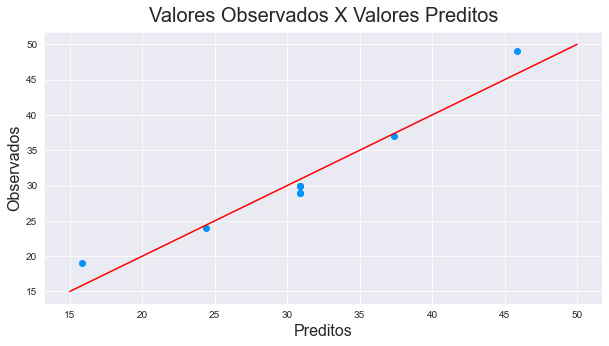

In [35]:
# Parâmetros
plt.figure(figsize = (10,5))
plt.xlabel('Preditos', fontsize = 16)
plt.ylabel('Observados', fontsize = 16)
plt.title('Valores Observados X Valores Preditos', fontsize = 20, pad = 10)

# Linha guia
x = np.linspace(start = 15, stop = 50, num = 10)
y = np.linspace(start = 15, stop = 50, num = 10)

# Reta
plt.plot(x, y, color = 'red')

# Comparação
plt.scatter(x = preditos, y = observados)

In [36]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porções   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           0.000571
Time:                        14:16:18   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

 ## Explorando o modelo
 <hr>

In [37]:
parametros = modelo_ajustado_2.params
parametros

Intercept    30.875
Farinha      10.750
Chocolate     4.250
dtype: float64

### Definindo a função

In [38]:
def modelo_receita(x_farinha, x_chocolate):
    # Limites de interpolação 
    limite_normalizado = [-1, 1]
    limite_farinha = [0.5, 1.5]
    limite_chocolate = [0.1, 0.5]

    # Conversão 
    x_farinha_convertido = np.interp(x_farinha, limite_farinha, limite_normalizado)
    x_chocolate_convertido = np.interp(x_chocolate, limite_chocolate, limite_normalizado)

    # Cálculo de modelo
    porções = parametros.Intercept + parametros.Farinha * x_farinha_convertido + parametros.Chocolate * x_chocolate_convertido
    return round(porções)

In [39]:
modelo_receita(0.65, 0.15) 

20

<hr>
<img width='700px' src='figuras/Figura_22.png'> 
<hr>

#  Mapa de cores
<hr>

<hr>
<img width='700px' src='figuras/Figura_23.jpg'> 

#### Fonte: National Centers for Environmental Prediction
<hr>

<hr>

<img width='600px' src='figuras/Figura_24.png'> 

<hr>

In [40]:
x_farinha = np.linspace(start = 0.5, stop = 1.5, num = 10)
x_chocolate = np.linspace(start = 0.1, stop = 0.5 , num = 10)

In [41]:
pontos = []
for contador1 in x_farinha:
    temp = []
    for contador2 in x_chocolate:
        temp.append(modelo_receita(contador1, contador2))
    pontos.append(temp)

pontos

[[16, 17, 18, 19, 20, 21, 22, 22, 23, 24],
 [18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
 [21, 22, 23, 23, 24, 25, 26, 27, 28, 29],
 [23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
 [25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
 [28, 29, 30, 31, 32, 33, 33, 34, 35, 36],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [33, 34, 34, 35, 36, 37, 38, 39, 40, 41],
 [35, 36, 37, 38, 39, 40, 41, 42, 43, 43],
 [37, 38, 39, 40, 41, 42, 43, 44, 45, 46]]

### Construindo a superfície de resposta

https://matplotlib.org/users/colormaps.html

<a list of 7 text.Text objects>

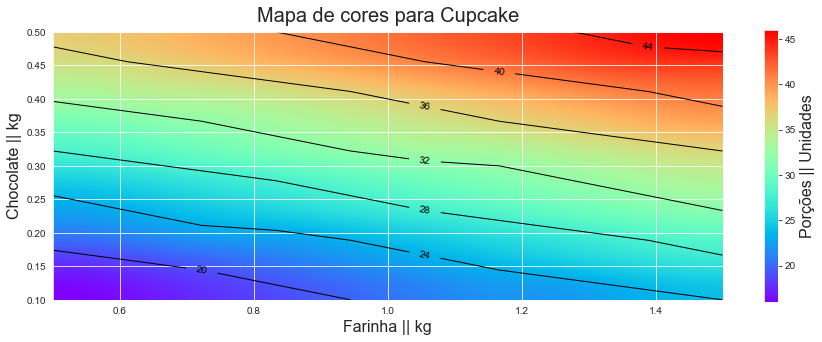

In [58]:
# Base
plt.figure(figsize=(15,5))
plt.xlabel('Farinha || kg', fontsize = 16)
plt.ylabel('Chocolate || kg', fontsize = 16)
plt.title('Mapa de cores para Cupcake', fontsize = 20, pad = 10)

# Mapa de cores
mapa_cor = plt.imshow(pontos,origin = 'lower', cmap = cm.rainbow, interpolation = 'quadric', extent = (0.5, 1.5, 0.1, 0.5))
plt.colorbar().set_label('Porções || Unidades', fontsize = 16)

# Isolinhas
linhas = plt.contour(x_farinha, x_chocolate, pontos, colors = 'black', linewidths = 1)
plt.clabel(linhas, inline = True, fmt = '%1.0f', fontsize = 10, inline_spacing = 10)